# Table of content
1- Importing libraries

2- Data Pre-processing 

3- Data Exploring

4- Data Splitting

Split the data
5- Model training

Random Forest
Logistic regression
xgboost
6- Model Evaluation

Accuracy
F1 Score
Recall
Precision
Confusion Matrix
7- Model Comparison 

In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Data Preprocessing

In [3]:
df = pd.read_parquet("C:/Users/HomePC/Downloads/archive (1)/bccc-cpacket-cloud-ddos-2024-merged.parquet")

In [4]:
df.head(5)

,src_port,dst_port,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,...,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len,label,activity
0,54573,25094,0.000063,3,2,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
1,25094,54573,0.000000,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,54573,25094,0.000028,3,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,9147,18060,0.000055,3,2,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
4,18060,9147,0.000000,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [5]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [6]:
#Unique values in the label target column

df.loc[:,'label'].unique()

array(['Benign', 'Attack', 'Suspicious'], dtype=object)

In [7]:
#Unique values in the activity target column

df.loc[:,'activity'].unique()

array(['Benign', 'Benign-Telnet', 'Benign-Email-Receive',
       'Benign-Systemic', 'Benign-Web_Browsing_HTTP-S',
       'Benign-Email-Send', 'Benign-SSH', 'Benign-FTP',
       'Attack-TCP-Valid-SYN', 'Attack-TCP-BYPass-V1', 'Suspicious',
       'Attack-Killall-v2', 'Attack-TCP-IGMP', 'Attack-TCP-SYN',
       'Attack-Killer-TCP', 'Attack-TCP-Control', 'Attack-TCP-Flag-MIX',
       'Attack-TCP-Flag-SYN', 'Attack-TCP-Flag-ACK',
       'Attack-TCP-Flag-SYN-ACK', 'Attack-TCP-Flag-ACK-PSH',
       'Attack-TCP-Flag-RST-ACK', 'Attack-TCP-Flag-SYN-TFO',
       'Attack-TCP-Flag-SYN-TIME', 'Attack-TCP-Flag-OSYN',
       'Attack-TCP-Flag-OSYNP'], dtype=object)

In [8]:
df.isna().sum()


src_port                                0
dst_port                                0
duration                                0
packets_count                           0
fwd_packets_count                       0
                                       ..
median_fwd_payload_bytes_delta_len      0
skewness_fwd_payload_bytes_delta_len    0
cov_fwd_payload_bytes_delta_len         0
label                                   0
activity                                0
Length: 319, dtype: int64

In [9]:
df.dtypes.value_counts()


float32    261
int8        25
int32       20
int16        9
int64        2
object       2
Name: count, dtype: int64

In [10]:
df.describe()

,src_port,dst_port,duration,packets_count,fwd_packets_count,bwd_packets_count,total_payload_bytes,fwd_total_payload_bytes,bwd_total_payload_bytes,payload_bytes_max,...,cov_bwd_payload_bytes_delta_len,min_fwd_payload_bytes_delta_len,max_fwd_payload_bytes_delta_len,mean_fwd_payload_bytes_delta_len,mode_fwd_payload_bytes_delta_len,variance_fwd_payload_bytes_delta_len,std_fwd_payload_bytes_delta_len,median_fwd_payload_bytes_delta_len,skewness_fwd_payload_bytes_delta_len,cov_fwd_payload_bytes_delta_len
count,540494.000000,540494.000000,540494.000000,5.404940e+05,5.404940e+05,5.404940e+05,5.404940e+05,5.404940e+05,5.404940e+05,540494.000000,...,540494.000000,540494.000000,540494.000000,540494.000000,540494.000000,5.404940e+05,540494.000000,540494.000000,540494.000000,540494.000000
mean,42256.697427,24618.095415,0.237969,1.869889e+01,5.484738e+00,1.321415e+01,2.024913e+04,2.954250e+03,1.729487e+04,2.659815,...,2.551771,-1.179016,1.092710,-0.045987,-0.816701,2.572928e+02,0.683516,-0.025944,-0.000270,0.480301
std,15823.578431,20865.794262,9.944489,5.620174e+03,1.683385e+03,4.597685e+03,6.977092e+06,2.134364e+06,6.642618e+06,51.832596,...,960.233276,29.564453,29.088524,8.374739,22.672567,7.554470e+03,16.013132,8.065349,0.151880,197.924744
min,2.000000,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,-9073.369141,-1460.000000,-970.000000,-970.000000,-1460.000000,0.000000e+00,0.000000,-970.000000,-104.726799,-7541.995117
25%,41063.000000,5060.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,45094.000000,18784.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,53083.000000,44756.000000,0.000092,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,65534.000000,65535.000000,3570.692627,2.524044e+06,1.097428e+06,2.171786e+06,3.166384e+09,1.569076e+09,3.166383e+09,1460.000000,...,655582.562500,1368.000000,1460.000000,1368.000000,1368.000000,1.338966e+06,1157.137085,1368.000000,3.875500,138843.906250


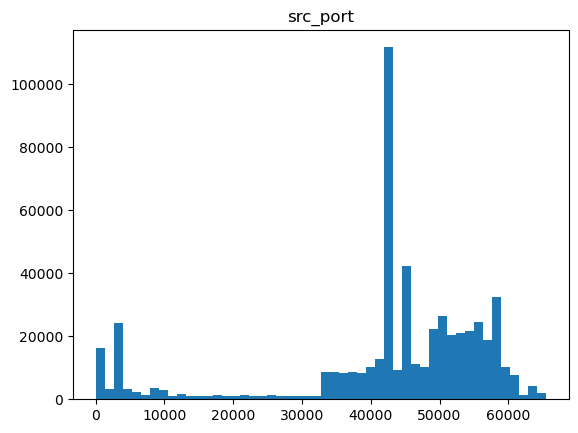

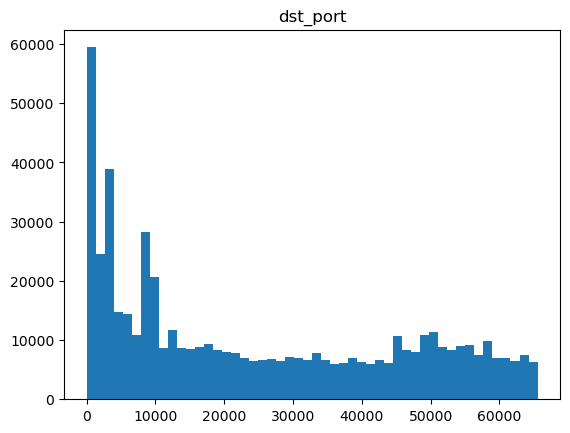

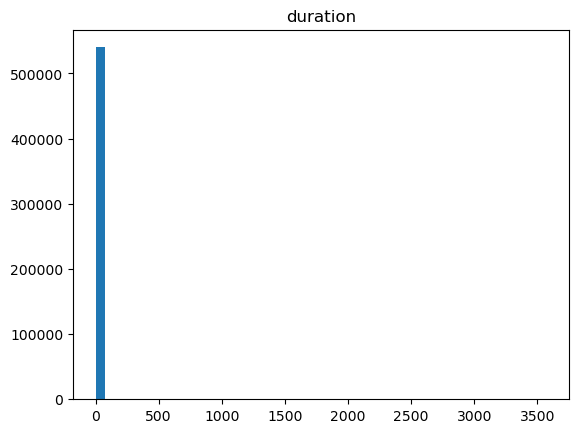

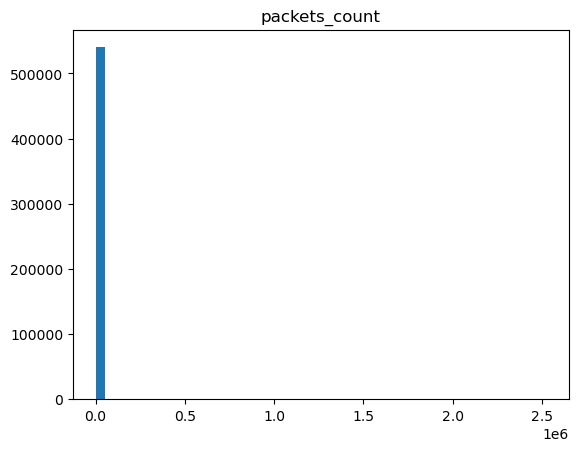

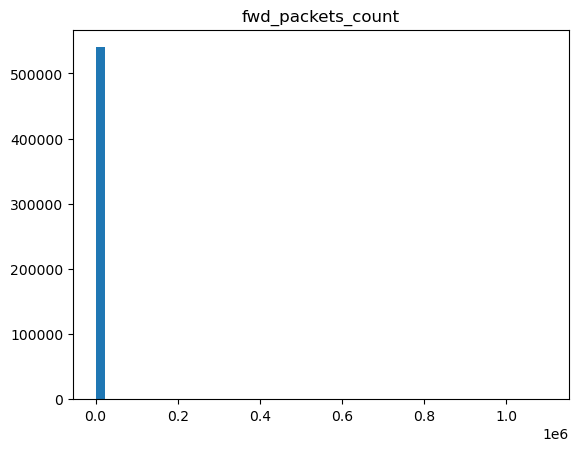

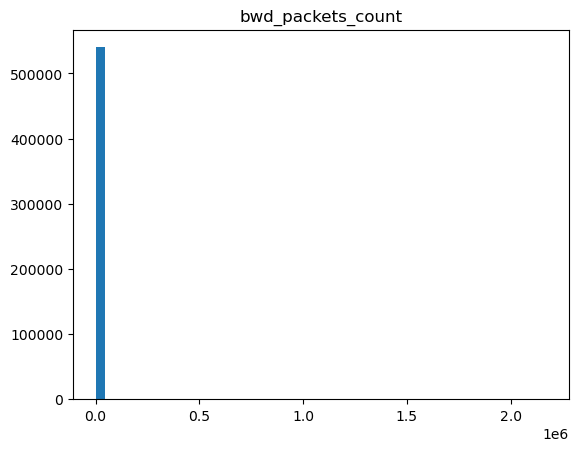

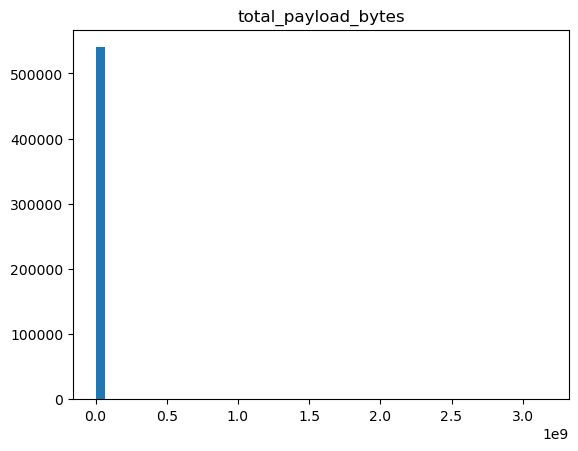

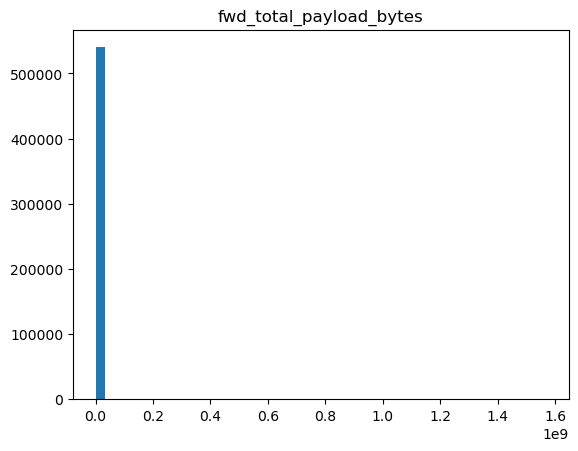

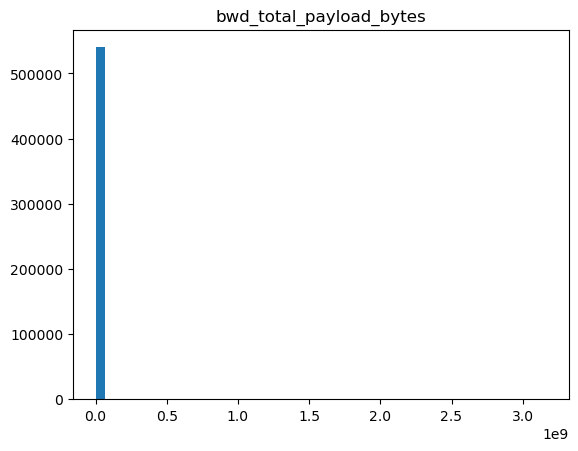

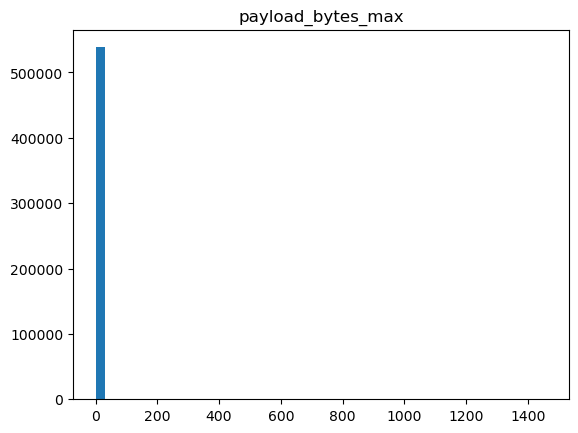

In [11]:
sampled_cols = df.columns[:10]   # first 10 features
for col in sampled_cols:
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.show()


# Data Splitting into test and train

In [13]:
# 1. Define features and target
X = df.drop(columns=["label", "activity"])   # features
y = df['label'].map({'Benign': 0, 'Attack': 1, 'Suspicious': 2})

# 2. Split before scaling (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale only the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (432395, 317)
The test dataset size =  (108099, 317)


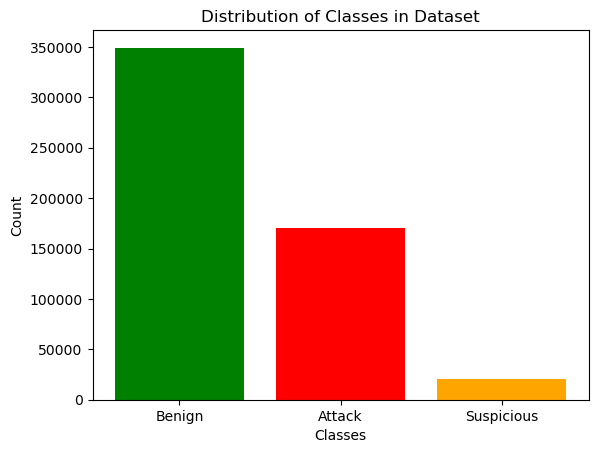

In [15]:
label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values, color=['green','red','orange'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of Classes in Dataset")
plt.show()

# Training the model

In [17]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


              precision    recall  f1-score   support

      Benign       0.99      0.94      0.97     69836
      Attack       0.99      0.82      0.89     34087
  Suspicious       0.29      0.95      0.45      4176

    accuracy                           0.90    108099
   macro avg       0.76      0.90      0.77    108099
weighted avg       0.96      0.90      0.92    108099



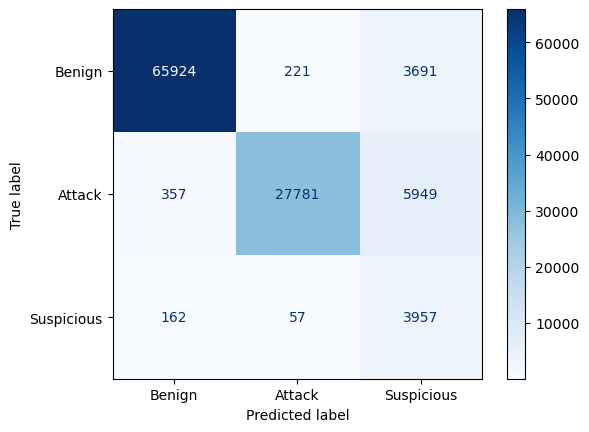

In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred, target_names=['Benign','Attack','Suspicious']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Benign','Attack','Suspicious'], cmap="Blues")
plt.show()


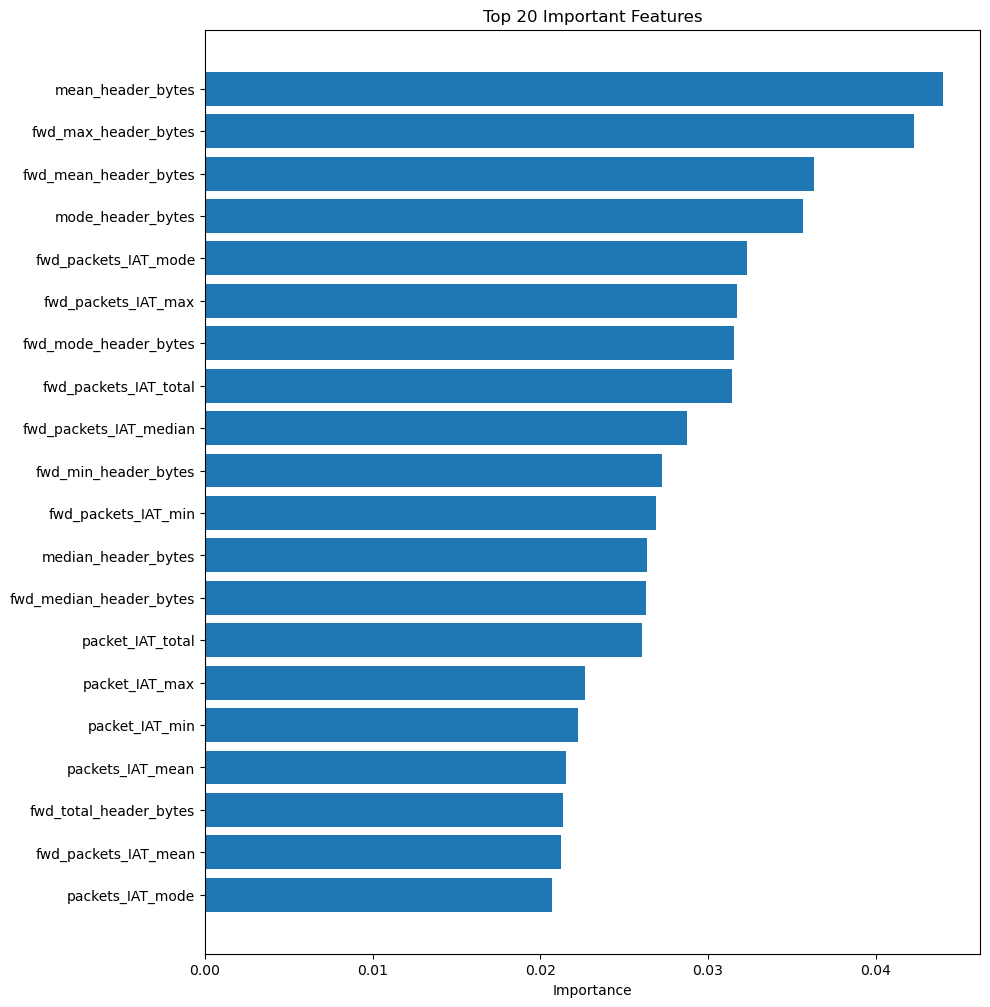

In [20]:
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]  # sort descending

plt.figure(figsize=(10, 12))
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), X.columns[indices[:20]])
plt.xlabel("Importance")
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()


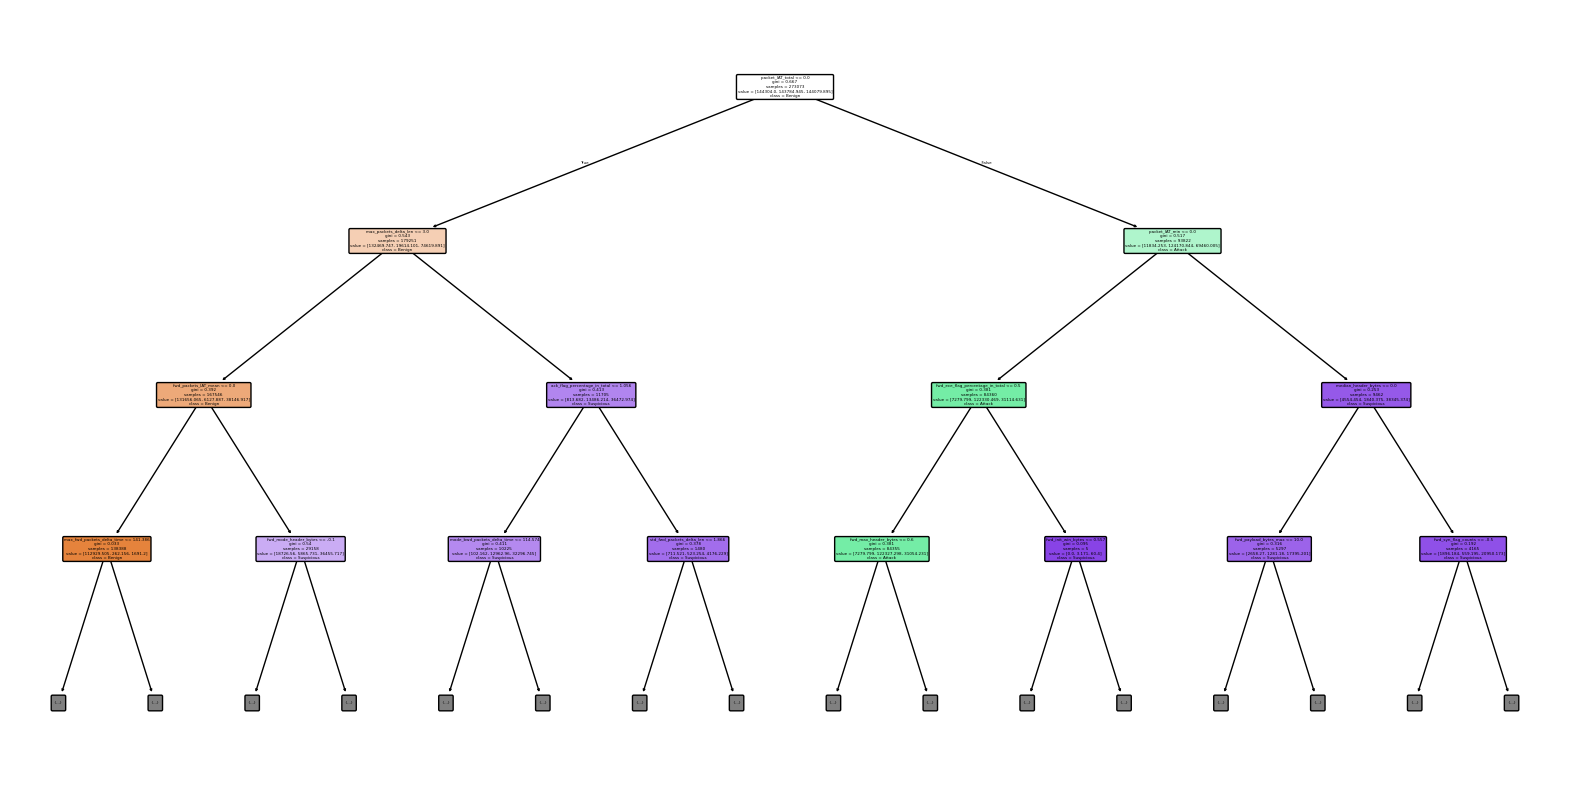

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          filled=True, 
          rounded=True, 
          max_depth=3,   # <-- limit depth to keep it readable
          feature_names=X.columns,
          class_names=['Benign','Attack','Suspicious'])
plt.show()


# Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1_macro = f1_score(y_test, y_pred, average='macro')
rf_f1_weighted = f1_score(y_test, y_pred, average='weighted')
rf_precision = precision_score(y_test, y_pred, average='macro')
rf_recall = recall_score(y_test, y_pred, average='macro')

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score (Macro): {rf_f1_macro:.4f}')
print(f'F1 Score (Weighted): {rf_f1_weighted:.4f}')
print(f'Precision (Macro): {rf_precision:.4f}')
print(f'Recall (Macro): {rf_recall:.4f}')



Random Forest Metrics:
Accuracy: 0.9034
F1 Score (Macro): 0.7689
F1 Score (Weighted): 0.9242
Precision (Macro): 0.7578
Recall (Macro): 0.9022


In [24]:
# Binary classification: Group Suspicious with Attack
y_binary = df['label'].map({
    'Benign': 0,           # Safe traffic
    'Attack': 1,           # DDoS attacks
    'Suspicious': 1        # Treat as potential attacks
})

# Features
X = df.drop(columns=["label", "activity"])

# Split before scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Scale features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate
print("Binary Classification (Suspicious grouped with Attack):")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Attack/Suspicious']))

Binary Classification (Suspicious grouped with Attack):
                   precision    recall  f1-score   support

           Benign       0.99      0.97      0.98     69836
Attack/Suspicious       0.95      0.98      0.96     38263

         accuracy                           0.97    108099
        macro avg       0.97      0.97      0.97    108099
     weighted avg       0.97      0.97      0.97    108099



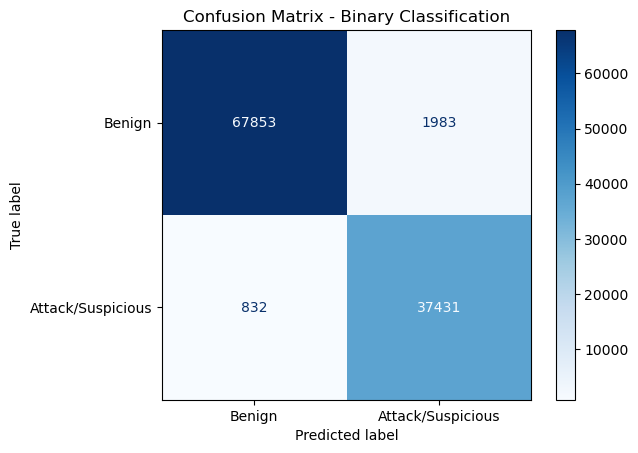

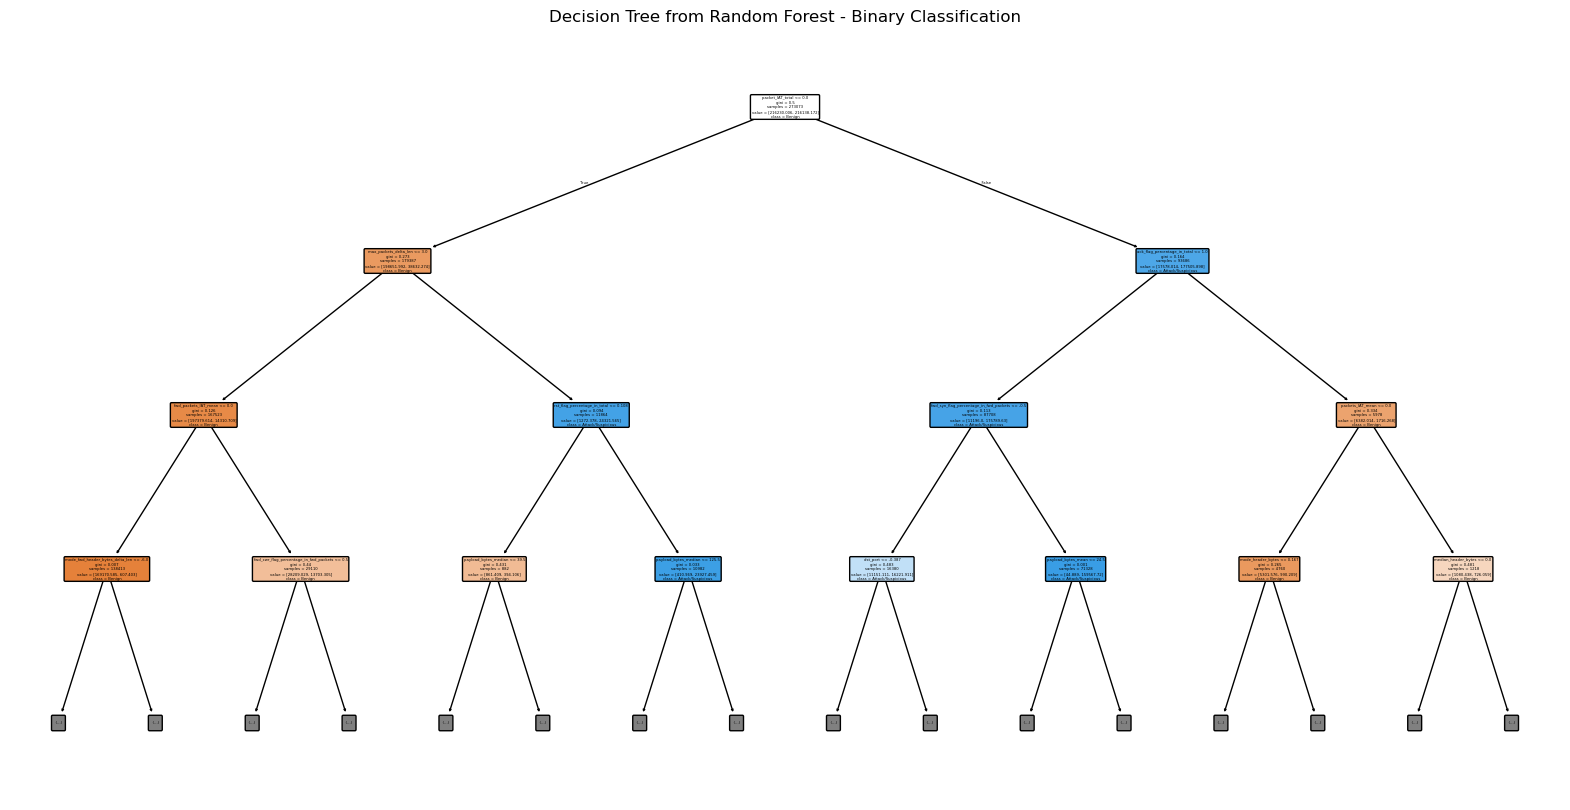

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Updated confusion matrix for binary classification
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=['Benign', 'Attack/Suspicious'], 
    cmap="Blues"
)
plt.title("Confusion Matrix - Binary Classification")
plt.show()

# Updated decision tree visualization for binary classification
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          filled=True, 
          rounded=True, 
          max_depth=3,
          feature_names=X.columns,
          class_names=['Benign', 'Attack/Suspicious'])  # Updated class names
plt.title("Decision Tree from Random Forest - Binary Classification")
plt.show()

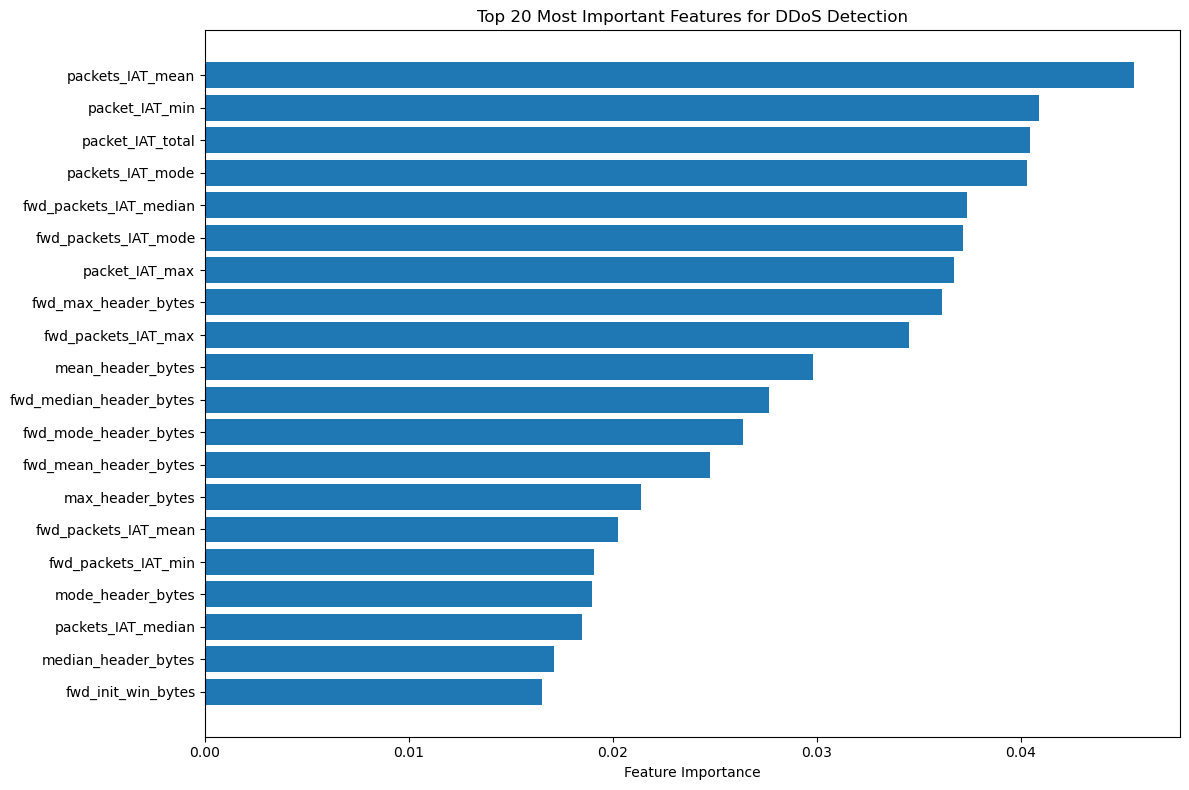

In [26]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance.head(20)['feature'], feature_importance.head(20)['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features for DDoS Detection')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

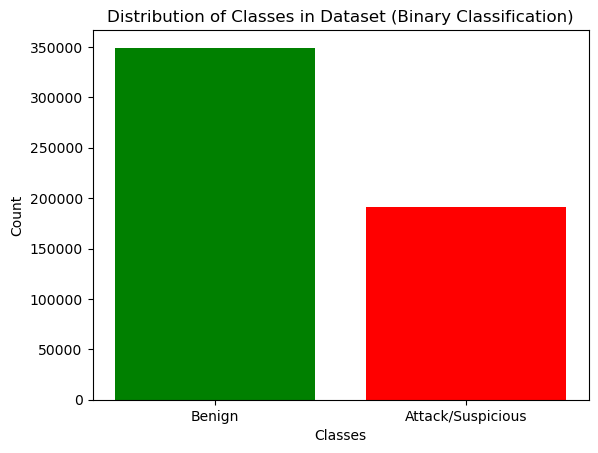

In [27]:
# Since you're now using binary classification, you need to update the data
# First, create the binary target variable
y_binary = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 1
})

# Create a new dataframe column or series for visualization
df_binary = df.copy()
df_binary['label_binary'] = df['label'].map({
    'Benign': 'Benign',
    'Attack': 'Attack/Suspicious',
    'Suspicious': 'Attack/Suspicious'
})

# Plot the binary class distribution
label_counts = df_binary['label_binary'].value_counts()
plt.bar(label_counts.index, label_counts.values, color=['green', 'red'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of Classes in Dataset (Binary Classification)")
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ==========================
# STEP 1: BINARY CLASSIFIER
# ==========================

# Binary: 0 = Benign, 1 = Attack/Suspicious
y_binary = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 1
})

X = df.drop(columns=["label", "activity"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Scale
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest for binary
rf_binary = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_binary.fit(X_train_scaled, y_train)
y_pred_binary = rf_binary.predict(X_test_scaled)

print("STEP 1: Binary Classification (Benign vs Attack/Suspicious)")
print(classification_report(y_test, y_pred_binary, target_names=['Benign', 'Attack/Suspicious']))
print("="*60)

# ==========================
# STEP 2: GROUP CLASSIFIER
# ==========================

# Define grouping for attack types
def group_activities(activity):
    if activity.startswith('Benign'):
        return 'Benign'
    elif 'SYN' in activity:
        return 'Attack-SYN-Based'
    elif 'Flag' in activity:
        return 'Attack-TCP-Flag'
    elif 'Kill' in activity:
        return 'Attack-Application'
    elif 'BYPass' in activity or 'Control' in activity:
        return 'Attack-TCP-Protocol'
    elif activity == 'Suspicious':
        return 'Suspicious'
    else:
        return 'Attack-Other'

# Apply grouping
y_group = df['activity'].apply(group_activities)

# Only attacks for training step 2
X_attack = df[y_binary == 1].drop(columns=["label", "activity"])
y_attack = y_group[y_binary == 1]

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack, test_size=0.2, random_state=42, stratify=y_attack
)

X_train_a_scaled = scaler.fit_transform(X_train_a)
X_test_a_scaled = scaler.transform(X_test_a)

rf_group = RandomForestClassifier(
    n_estimators=250,
    max_depth=25,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_group.fit(X_train_a_scaled, y_train_a)
y_pred_group = rf_group.predict(X_test_a_scaled)

print("STEP 2: Group Classification (For Attacks only)")
print(classification_report(y_test_a, y_pred_group))
print("="*60)

# ==========================
# FINAL PREDICTION FUNCTION
# ==========================

def predict_sample(sample):
    """Takes a single row (pd.DataFrame) and predicts class and attack group"""
    sample_scaled = scaler.transform(sample)

    # Step 1: Binary prediction
    binary_pred = rf_binary.predict(sample_scaled)[0]

    if binary_pred == 0:
        return "Benign"
    else:
        group_pred = rf_group.predict(sample_scaled)[0]
        return f"Attack detected → {group_pred}"

# Example usage
sample = X_test.iloc[[0]]  # first sample from test set
print("Sample prediction:", predict_sample(sample))


STEP 1: Binary Classification (Benign vs Attack/Suspicious)
                   precision    recall  f1-score   support

           Benign       0.99      0.97      0.98     69836
Attack/Suspicious       0.95      0.98      0.96     38263

         accuracy                           0.97    108099
        macro avg       0.97      0.97      0.97    108099
     weighted avg       0.97      0.97      0.97    108099

STEP 2: Group Classification (For Attacks only)
                     precision    recall  f1-score   support

 Attack-Application       0.52      0.66      0.58      1174
       Attack-Other       0.43      0.61      0.50       592
   Attack-SYN-Based       0.72      0.73      0.73      3043
    Attack-TCP-Flag       0.60      0.71      0.65      1958
Attack-TCP-Protocol       1.00      0.98      0.99     27321
         Suspicious       0.91      0.78      0.84      4176

           accuracy                           0.91     38264
          macro avg       0.70      0.75     

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ==========================
# STEP 1: BINARY CLASSIFIER (keep as is)
# ==========================
y_binary = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 1
})
X = df.drop(columns=["label", "activity"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_binary = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_binary.fit(X_train_scaled, y_train)
y_pred_binary = rf_binary.predict(X_test_scaled)

print("STEP 1: Binary Classification")
print(classification_report(y_test, y_pred_binary, target_names=['Benign', 'Attack/Suspicious']))

# ==========================
# STEP 2: ATTACK CLASSIFIER (only change this part)
# ==========================
def group_activities(activity):
    if 'SYN' in activity:
        return 'Attack-SYN-Based'
    elif 'Flag' in activity:
        return 'Attack-TCP-Flag'
    elif 'BYPass' in activity or 'Control' in activity:
        return 'Attack-TCP-Protocol'
    elif activity == 'Suspicious':
        return 'Suspicious'
    else:
        return 'Attack-Other'

# Filter attack data only
attack_data = df[df['label'].isin(['Attack', 'Suspicious'])]
X_attack = attack_data.drop(columns=["label", "activity"])
y_attack = attack_data['activity'].apply(group_activities)

# NEW SCALER for attack data only
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack, test_size=0.2, random_state=42, stratify=y_attack
)

scaler_attack = RobustScaler()  # NEW scaler
X_train_a_scaled = scaler_attack.fit_transform(X_train_a)
X_test_a_scaled = scaler_attack.transform(X_test_a)

rf_group = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_group.fit(X_train_a_scaled, y_train_a)
y_pred_group = rf_group.predict(X_test_a_scaled)

print("STEP 2: Attack Classification")
print(classification_report(y_test_a, y_pred_group))

# Updated prediction function
def predict_sample(sample):
    sample_scaled = scaler.transform(sample)
    binary_pred = rf_binary.predict(sample_scaled)[0]
    
    if binary_pred == 0:
        return "Benign"
    else:
        sample_scaled_attack = scaler_attack.transform(sample)  # Use correct scaler
        group_pred = rf_group.predict(sample_scaled_attack)[0]
        return f"Attack detected → {group_pred}"

STEP 1: Binary Classification
                   precision    recall  f1-score   support

           Benign       0.99      0.97      0.98     69836
Attack/Suspicious       0.95      0.98      0.96     38263

         accuracy                           0.97    108099
        macro avg       0.97      0.97      0.97    108099
     weighted avg       0.97      0.97      0.97    108099

STEP 2: Attack Classification
                     precision    recall  f1-score   support

       Attack-Other       0.51      0.70      0.59      1766
   Attack-SYN-Based       0.73      0.73      0.73      3043
    Attack-TCP-Flag       0.58      0.70      0.63      1958
Attack-TCP-Protocol       1.00      0.98      0.99     27321
         Suspicious       0.93      0.77      0.85      4176

           accuracy                           0.91     38264
          macro avg       0.75      0.78      0.76     38264
       weighted avg       0.93      0.91      0.92     38264



In [38]:
# Combine the weakest classes to improve overall performance
def optimized_group_activities(activity):
    if 'SYN' in activity:
        return 'SYN-Attacks'
    elif 'BYPass' in activity or 'Control' in activity:
        return 'Protocol-Attacks'
    elif activity == 'Suspicious':
        return 'Suspicious'  
    else:
        # Merge all other attack types together
        return 'Mixed-Attacks'  # Flag + Kill + Other combined

In [39]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

# ==========================
# STEP 1: BINARY CLASSIFIER
# ==========================
y_binary = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 1
})
X = df.drop(columns=["label", "activity"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_binary = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_binary.fit(X_train_scaled, y_train)
y_pred_binary = rf_binary.predict(X_test_scaled)

print("STEP 1: Binary Classification")
print(classification_report(y_test, y_pred_binary, target_names=['Benign', 'Attack/Suspicious']))
print("="*60)

# ==========================
# STEP 2: IMPROVED ATTACK CLASSIFIER
# ==========================
# OPTIMIZED grouping function - merge weak classes
def optimized_group_activities(activity):
    if 'SYN' in activity:
        return 'SYN-Attacks'
    elif 'BYPass' in activity or 'Control' in activity:
        return 'Protocol-Attacks'
    elif activity == 'Suspicious':
        return 'Suspicious'
    else:
        # Merge Flag, Kill, and Other attacks together
        return 'Mixed-Attacks'

# Filter attack data only
attack_data = df[df['label'].isin(['Attack', 'Suspicious'])]
X_attack = attack_data.drop(columns=["label", "activity"])
y_attack = attack_data['activity'].apply(optimized_group_activities)

print("Optimized attack group distribution:")
print(y_attack.value_counts())
print()

# Separate scaler for attack data
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack, test_size=0.2, random_state=42, stratify=y_attack
)

scaler_attack = RobustScaler()
X_train_a_scaled = scaler_attack.fit_transform(X_train_a)
X_test_a_scaled = scaler_attack.transform(X_test_a)

# Enhanced Random Forest for attack classification
rf_group = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1
)

rf_group.fit(X_train_a_scaled, y_train_a)
y_pred_group = rf_group.predict(X_test_a_scaled)

print("STEP 2: Optimized Attack Classification")
print(classification_report(y_test_a, y_pred_group))
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_a, y_pred_group):.3f}")
print("="*60)

# ==========================
# FINAL PREDICTION FUNCTION
# ==========================
def predict_sample(sample):
    """Takes a single row and predicts class and attack type"""
    # Step 1: Binary prediction
    sample_scaled = scaler.transform(sample)
    binary_pred = rf_binary.predict(sample_scaled)[0]
    
    if binary_pred == 0:
        return "Benign"
    else:
        # Step 2: Attack type prediction with correct scaler
        sample_scaled_attack = scaler_attack.transform(sample)
        group_pred = rf_group.predict(sample_scaled_attack)[0]
        return f"Attack detected → {group_pred}"

# Test the prediction function
sample = X_test.iloc[[0]]
print(f"Sample prediction: {predict_sample(sample)}")

STEP 1: Binary Classification
                   precision    recall  f1-score   support

           Benign       0.99      0.97      0.98     69836
Attack/Suspicious       0.95      0.98      0.96     38263

         accuracy                           0.97    108099
        macro avg       0.97      0.97      0.97    108099
     weighted avg       0.97      0.97      0.97    108099

Optimized attack group distribution:
activity
Protocol-Attacks    136601
Suspicious           20880
Mixed-Attacks        18618
SYN-Attacks          15217
Name: count, dtype: int64

STEP 2: Optimized Attack Classification
                  precision    recall  f1-score   support

   Mixed-Attacks       0.60      0.94      0.74      3724
Protocol-Attacks       1.00      0.98      0.99     27321
     SYN-Attacks       0.85      0.66      0.75      3043
      Suspicious       0.97      0.76      0.86      4176

        accuracy                           0.93     38264
       macro avg       0.86      0.84     

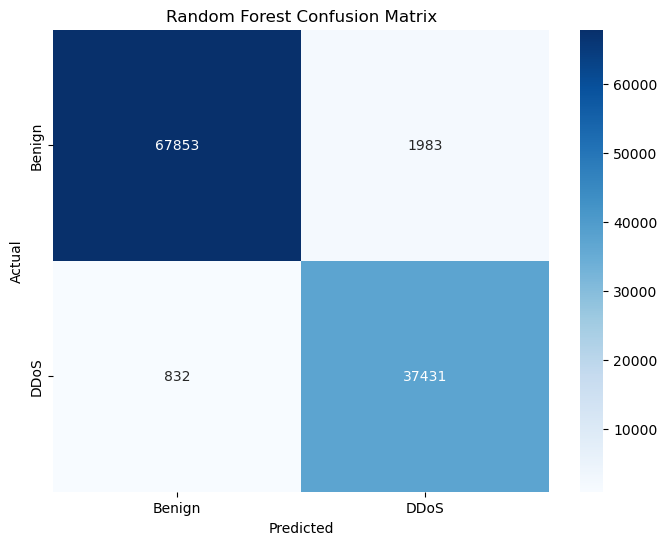

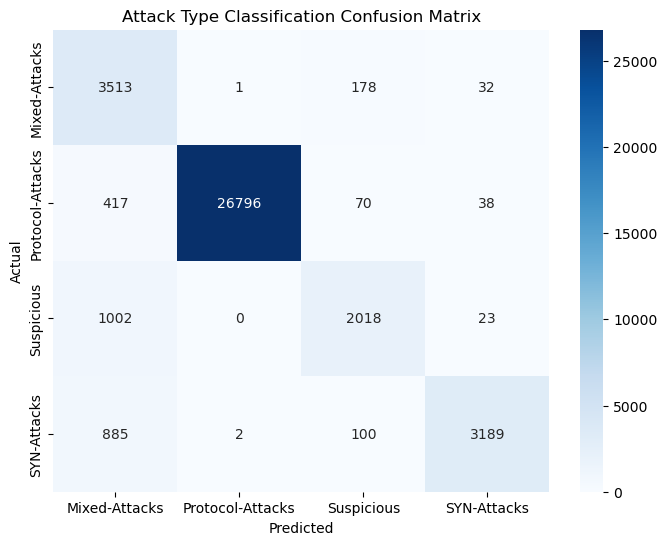

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Simple confusion matrix function (like your friend's)
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# For your binary classification
plot_confusion_matrix(y_test, y_pred_binary, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

# For your attack classification
plot_confusion_matrix(y_test_a, y_pred_group, 
                     ['Mixed-Attacks', 'Protocol-Attacks', 'Suspicious', 'SYN-Attacks'], 
                     'Attack Type Classification Confusion Matrix')

C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


STEP 1: Logistic Regression Binary Classification
                   precision    recall  f1-score   support

           Benign       0.91      0.84      0.87     69836
Attack/Suspicious       0.75      0.84      0.79     38263

         accuracy                           0.84    108099
        macro avg       0.83      0.84      0.83    108099
     weighted avg       0.85      0.84      0.84    108099

STEP 2: Logistic Regression Attack Classification
                  precision    recall  f1-score   support

   Mixed-Attacks       0.35      0.44      0.39      3724
Protocol-Attacks       0.76      0.51      0.61     27321
     SYN-Attacks       0.39      0.01      0.02      3043
      Suspicious       0.07      0.26      0.11      4176

        accuracy                           0.44     38264
       macro avg       0.39      0.31      0.28     38264
    weighted avg       0.61      0.44      0.49     38264

Balanced Accuracy: 0.307


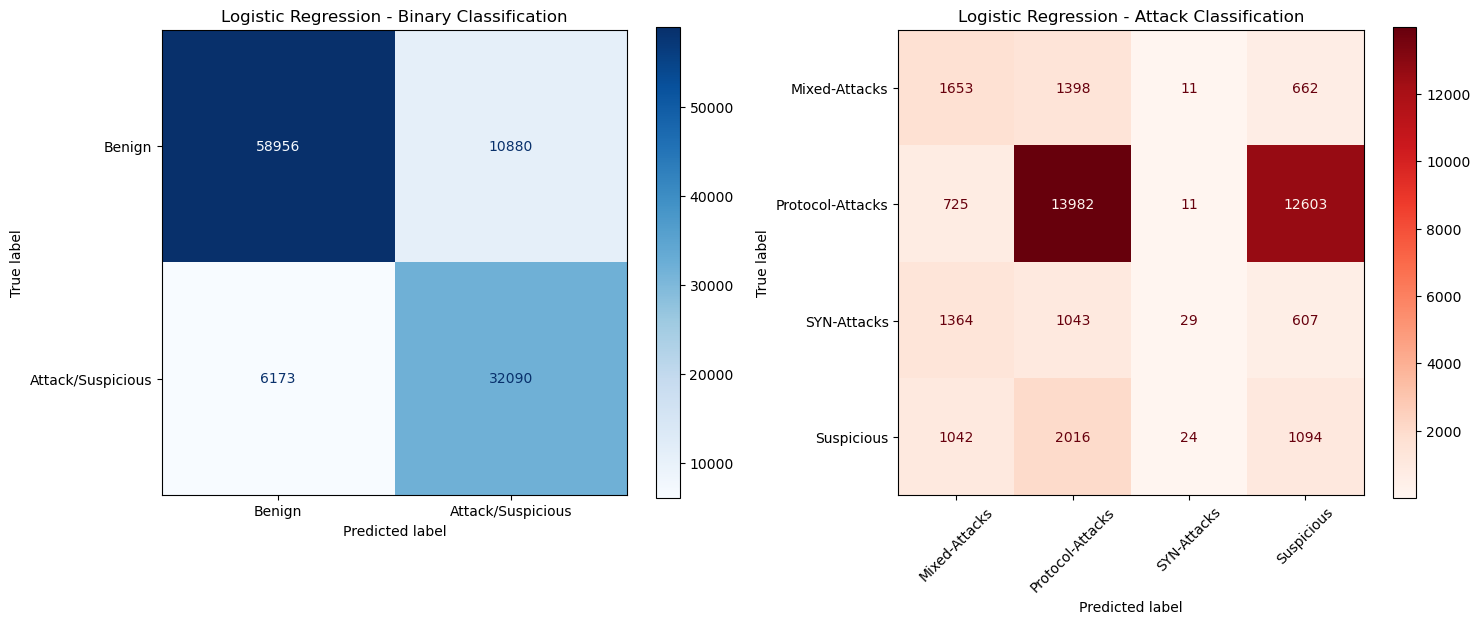

Sample prediction: Attack detected → Mixed-Attacks


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ==========================
# DATA PREPARATION
# ==========================
# Binary target
y_binary = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 1
})

# Attack grouping function
def optimized_group_activities(activity):
    if 'SYN' in activity:
        return 'SYN-Attacks'
    elif 'BYPass' in activity or 'Control' in activity:
        return 'Protocol-Attacks'
    elif activity == 'Suspicious':
        return 'Suspicious'
    else:
        return 'Mixed-Attacks'

X = df.drop(columns=["label", "activity"])

# ==========================
# STEP 1: BINARY CLASSIFICATION
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression for binary classification
lr_binary = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear'
)

lr_binary.fit(X_train_scaled, y_train)
lr_pred_binary = lr_binary.predict(X_test_scaled)

print("STEP 1: Logistic Regression Binary Classification")
print(classification_report(y_test, lr_pred_binary, target_names=['Benign', 'Attack/Suspicious']))
print("="*60)

# ==========================
# STEP 2: ATTACK CLASSIFICATION
# ==========================
# Prepare attack data
attack_data = df[df['label'].isin(['Attack', 'Suspicious'])]
X_attack = attack_data.drop(columns=["label", "activity"])
y_attack = attack_data['activity'].apply(optimized_group_activities)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack, test_size=0.2, random_state=42, stratify=y_attack
)

scaler_attack = RobustScaler()
X_train_a_scaled = scaler_attack.fit_transform(X_train_a)
X_test_a_scaled = scaler_attack.transform(X_test_a)

# Train Logistic Regression for attack classification
lr_attack = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear'
)

lr_attack.fit(X_train_a_scaled, y_train_a)
lr_pred_attack = lr_attack.predict(X_test_a_scaled)

print("STEP 2: Logistic Regression Attack Classification")
print(classification_report(y_test_a, lr_pred_attack))
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_a, lr_pred_attack):.3f}")
print("="*60)

# ==========================
# CONFUSION MATRICES
# ==========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Binary Classification Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, lr_pred_binary,
    display_labels=['Benign', 'Attack/Suspicious'],
    ax=ax1, cmap='Blues', values_format='d'
)
ax1.set_title('Logistic Regression - Binary Classification')

# Attack Classification Confusion Matrix
attack_labels = sorted(y_test_a.unique())
ConfusionMatrixDisplay.from_predictions(
    y_test_a, lr_pred_attack,
    display_labels=attack_labels,
    ax=ax2, cmap='Reds', values_format='d'
)
ax2.set_title('Logistic Regression - Attack Classification')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==========================
# PREDICTION FUNCTION
# ==========================
def predict_lr_sample(sample):
    """Logistic Regression prediction pipeline"""
    sample_scaled = scaler.transform(sample)
    binary_pred = lr_binary.predict(sample_scaled)[0]
    
    if binary_pred == 0:
        return "Benign"
    else:
        sample_attack = scaler_attack.transform(sample)
        attack_pred = lr_attack.predict(sample_attack)[0]
        return f"Attack detected → {attack_pred}"

# Test prediction
sample = X_test.iloc[[0]]
print(f"Sample prediction: {predict_lr_sample(sample)}")

In [43]:
pip install xgboost

✅ Feature names saved: ['src_port', 'dst_port', 'duration', 'packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max'] ...
✅ Scaler saved as scaler.pkl

STEP 1: XGBoost Binary Classification
                   precision    recall  f1-score   support

           Benign       0.99      0.99      0.99     69836
Attack/Suspicious       0.98      0.98      0.98     38263

         accuracy                           0.99    108099
        macro avg       0.98      0.98      0.98    108099
     weighted avg       0.99      0.99      0.99    108099

✅ Binary model saved as xgb_binary_model.pkl
✅ scaler_attack.pkl & label_encoder.pkl saved

STEP 2: XGBoost Attack Classification
                  precision    recall  f1-score   support

   Mixed-Attacks       0.63      0.85      0.73      3724
Protocol-Attacks       1.00      0.98      0.99     27321
     SYN-Attacks       0.79      0.67      0.73  

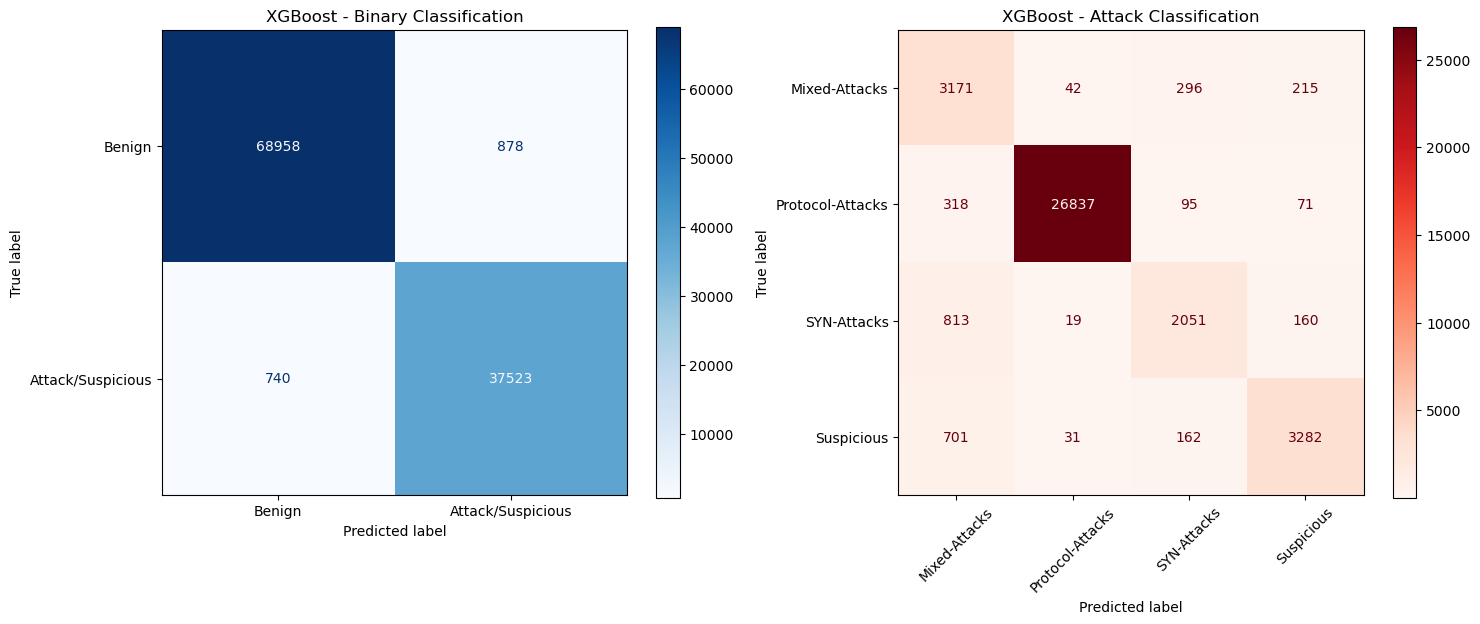


Sample prediction: Benign


In [44]:
# ==========================
# TRAINING SCRIPT (FULL)
# ==========================
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ==========================
# LOAD DATA
# ==========================


# ==========================
# BINARY TARGET
# ==========================
y_binary = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 1
})

# Grouping function for attack types
def optimized_group_activities(activity):
    if 'SYN' in activity:
        return 'SYN-Attacks'
    elif 'BYPass' in activity or 'Control' in activity:
        return 'Protocol-Attacks'
    elif activity == 'Suspicious':
        return 'Suspicious'
    else:
        return 'Mixed-Attacks'

X = df.drop(columns=["label", "activity"])

# ==========================
# STEP 1: BINARY CLASSIFICATION
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# ✅ Save feature names BEFORE scaling
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")
print("✅ Feature names saved:", feature_names[:10], "...")

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")

# Train XGBoost binary model
xgb_binary = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)
xgb_binary.fit(X_train_scaled, y_train)
xgb_pred_binary = xgb_binary.predict(X_test_scaled)

print("\nSTEP 1: XGBoost Binary Classification")
print(classification_report(y_test, xgb_pred_binary, target_names=['Benign', 'Attack/Suspicious']))

# Save binary model
joblib.dump(xgb_binary, "xgb_binary_model.pkl")
print("✅ Binary model saved as xgb_binary_model.pkl")

# ==========================
# STEP 2: ATTACK CLASSIFICATION
# ==========================
attack_data = df[df['label'].isin(['Attack', 'Suspicious'])]
X_attack = attack_data.drop(columns=["label", "activity"])
y_attack = attack_data['activity'].apply(optimized_group_activities)

# Encode labels
label_encoder = LabelEncoder()
y_attack_encoded = label_encoder.fit_transform(y_attack)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack_encoded, test_size=0.2, random_state=42, stratify=y_attack_encoded
)

scaler_attack = RobustScaler()
X_train_a_scaled = scaler_attack.fit_transform(X_train_a)
X_test_a_scaled = scaler_attack.transform(X_test_a)

# Save attack scaler + label encoder
joblib.dump(scaler_attack, "scaler_attack.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print("✅ scaler_attack.pkl & label_encoder.pkl saved")

# Train XGBoost attack model
xgb_attack = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_attack.fit(X_train_a_scaled, y_train_a)
xgb_pred_attack_encoded = xgb_attack.predict(X_test_a_scaled)

# Decode predictions
xgb_pred_attack = label_encoder.inverse_transform(xgb_pred_attack_encoded)
y_test_a_labels = label_encoder.inverse_transform(y_test_a)

print("\nSTEP 2: XGBoost Attack Classification")
print(classification_report(y_test_a_labels, xgb_pred_attack))
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_a_labels, xgb_pred_attack):.3f}")

# Save attack model
joblib.dump(xgb_attack, "xgb_attack_model.pkl")
print("✅ Attack model saved as xgb_attack_model.pkl")

# ==========================
# CONFUSION MATRICES
# ==========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, xgb_pred_binary,
    display_labels=['Benign', 'Attack/Suspicious'],
    ax=ax1, cmap='Blues', values_format='d'
)
ax1.set_title('XGBoost - Binary Classification')

attack_labels = sorted(label_encoder.classes_)
ConfusionMatrixDisplay.from_predictions(
    y_test_a_labels, xgb_pred_attack,
    display_labels=attack_labels,
    ax=ax2, cmap='Reds', values_format='d'
)
ax2.set_title('XGBoost - Attack Classification')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==========================
# PREDICTION FUNCTION
# ==========================
def predict_xgb_sample(sample):
    """XGBoost prediction pipeline"""
    sample_scaled = scaler.transform(sample)
    binary_pred = xgb_binary.predict(sample_scaled)[0]
    
    if binary_pred == 0:
        return "Benign"
    else:
        sample_attack = scaler_attack.transform(sample)
        attack_pred_encoded = xgb_attack.predict(sample_attack)[0]
        attack_pred = label_encoder.inverse_transform([attack_pred_encoded])[0]
        return f"Attack detected → {attack_pred}"

# Test prediction
sample = X_test.iloc[[0]]
print(f"\nSample prediction: {predict_xgb_sample(sample)}")


# model comparison

✅ Feature names saved: ['src_port', 'dst_port', 'duration', 'packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max'] ...
✅ Scaler saved as scaler.pkl

STEP 1: XGBoost Binary Classification
                   precision    recall  f1-score   support

           Benign       0.99      0.99      0.99     69836
Attack/Suspicious       0.98      0.98      0.98     38263

         accuracy                           0.99    108099
        macro avg       0.98      0.98      0.98    108099
     weighted avg       0.99      0.99      0.99    108099

✅ Binary model saved as xgb_binary_model.pkl
✅ scaler_attack.pkl & label_encoder.pkl saved

STEP 2: XGBoost Attack Classification
                  precision    recall  f1-score   support

   Mixed-Attacks       0.63      0.85      0.73      3724
Protocol-Attacks       1.00      0.98      0.99     27321
     SYN-Attacks       0.79      0.67      0.73  

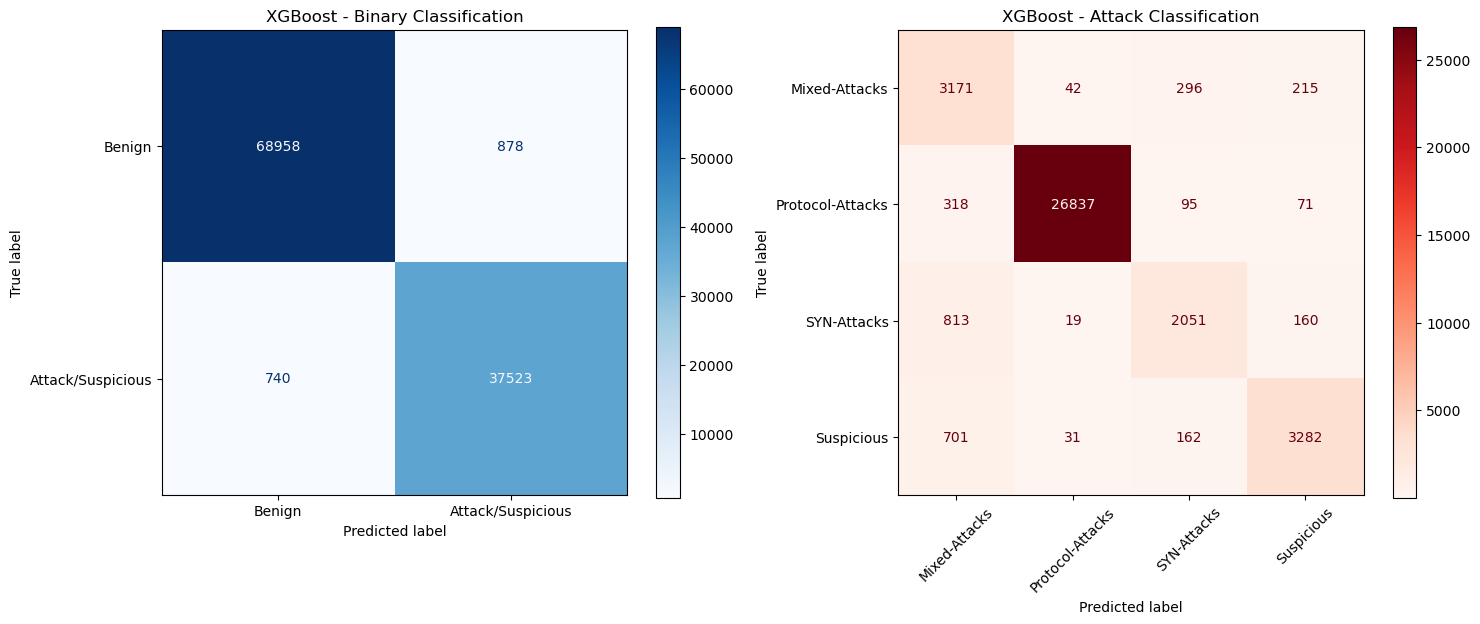


Sample prediction: Benign


In [46]:
# ==========================
# TRAINING SCRIPT (FULL)
# ==========================
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ==========================
# LOAD DATA
# ==========================
df = pd.read_parquet("C:/Users/HomePC/Downloads/archive (1)/bccc-cpacket-cloud-ddos-2024-merged.parquet")

# ==========================
# BINARY TARGET
# ==========================
y_binary = df['label'].map({
    'Benign': 0,
    'Attack': 1,
    'Suspicious': 1
})

# Grouping function for attack types
def optimized_group_activities(activity):
    if 'SYN' in activity:
        return 'SYN-Attacks'
    elif 'BYPass' in activity or 'Control' in activity:
        return 'Protocol-Attacks'
    elif activity == 'Suspicious':
        return 'Suspicious'
    else:
        return 'Mixed-Attacks'

X = df.drop(columns=["label", "activity"])

# ==========================
# STEP 1: BINARY CLASSIFICATION
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# ✅ Save feature names BEFORE scaling
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")
print("✅ Feature names saved:", feature_names[:10], "...")

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")

# Train XGBoost binary model
xgb_binary = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)
xgb_binary.fit(X_train_scaled, y_train)
xgb_pred_binary = xgb_binary.predict(X_test_scaled)

print("\nSTEP 1: XGBoost Binary Classification")
print(classification_report(y_test, xgb_pred_binary, target_names=['Benign', 'Attack/Suspicious']))

# Save binary model
joblib.dump(xgb_binary, "xgb_binary_model.pkl")
print("✅ Binary model saved as xgb_binary_model.pkl")

# ==========================
# STEP 2: ATTACK CLASSIFICATION
# ==========================
attack_data = df[df['label'].isin(['Attack', 'Suspicious'])]
X_attack = attack_data.drop(columns=["label", "activity"])
y_attack = attack_data['activity'].apply(optimized_group_activities)

# Encode labels
label_encoder = LabelEncoder()
y_attack_encoded = label_encoder.fit_transform(y_attack)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attack, y_attack_encoded, test_size=0.2, random_state=42, stratify=y_attack_encoded
)

scaler_attack = RobustScaler()
X_train_a_scaled = scaler_attack.fit_transform(X_train_a)
X_test_a_scaled = scaler_attack.transform(X_test_a)

# Save attack scaler + label encoder
joblib.dump(scaler_attack, "scaler_attack.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
print("✅ scaler_attack.pkl & label_encoder.pkl saved")

# Train XGBoost attack model
xgb_attack = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_attack.fit(X_train_a_scaled, y_train_a)
xgb_pred_attack_encoded = xgb_attack.predict(X_test_a_scaled)

# Decode predictions
xgb_pred_attack = label_encoder.inverse_transform(xgb_pred_attack_encoded)
y_test_a_labels = label_encoder.inverse_transform(y_test_a)

print("\nSTEP 2: XGBoost Attack Classification")
print(classification_report(y_test_a_labels, xgb_pred_attack))
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_a_labels, xgb_pred_attack):.3f}")

# Save attack model
joblib.dump(xgb_attack, "xgb_attack_model.pkl")
print("✅ Attack model saved as xgb_attack_model.pkl")

# ==========================
# CONFUSION MATRICES
# ==========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(
    y_test, xgb_pred_binary,
    display_labels=['Benign', 'Attack/Suspicious'],
    ax=ax1, cmap='Blues', values_format='d'
)
ax1.set_title('XGBoost - Binary Classification')

attack_labels = sorted(label_encoder.classes_)
ConfusionMatrixDisplay.from_predictions(
    y_test_a_labels, xgb_pred_attack,
    display_labels=attack_labels,
    ax=ax2, cmap='Reds', values_format='d'
)
ax2.set_title('XGBoost - Attack Classification')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==========================
# PREDICTION FUNCTION
# ==========================
def predict_xgb_sample(sample):
    """XGBoost prediction pipeline"""
    sample_scaled = scaler.transform(sample)
    binary_pred = xgb_binary.predict(sample_scaled)[0]
    
    if binary_pred == 0:
        return "Benign"
    else:
        sample_attack = scaler_attack.transform(sample)
        attack_pred_encoded = xgb_attack.predict(sample_attack)[0]
        attack_pred = label_encoder.inverse_transform([attack_pred_encoded])[0]
        return f"Attack detected → {attack_pred}"

# Test prediction
sample = X_test.iloc[[0]]
print(f"\nSample prediction: {predict_xgb_sample(sample)}")


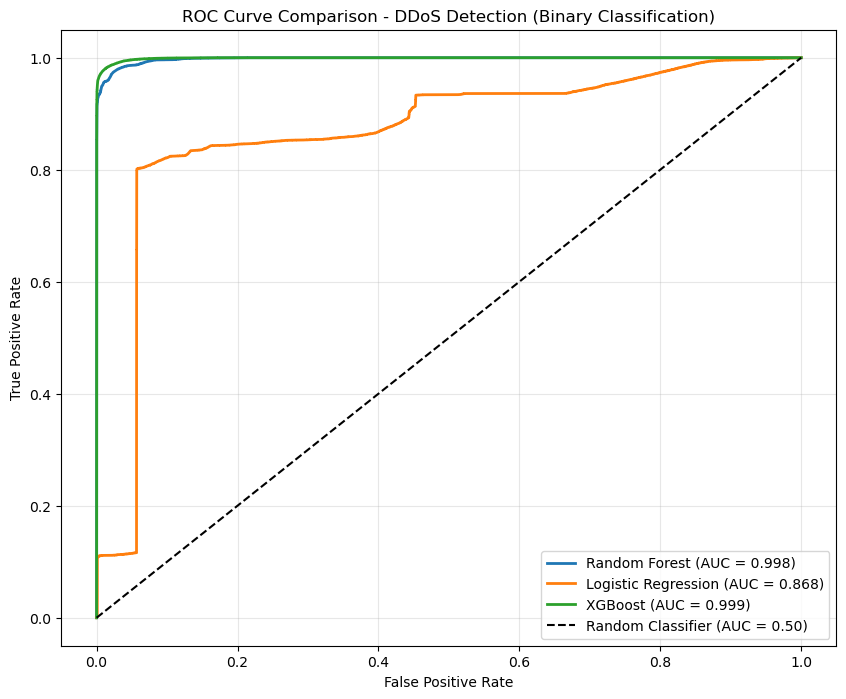

MODEL PERFORMANCE SUMMARY
Random Forest AUC:      0.998
Logistic Regression AUC: 0.868
XGBoost AUC:            0.999

Best performing model: XGBoost with AUC = 0.999


In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ==========================
# ROC CURVE COMPARISON FOR BINARY CLASSIFICATION
# ==========================

# Get prediction probabilities for all three models
# Random Forest
rf_proba = rf_binary.predict_proba(X_test_scaled)

# Logistic Regression  
lr_proba = lr_binary.predict_proba(X_test_scaled)

# XGBoost
xgb_proba = xgb_binary.predict_proba(X_test_scaled)

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

# Calculate ROC curve for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', linewidth=2)
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})', linewidth=2)

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - DDoS Detection (Binary Classification)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ==========================
# PERFORMANCE SUMMARY TABLE
# ==========================
print("="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Random Forest AUC:      {rf_auc:.3f}")
print(f"Logistic Regression AUC: {lr_auc:.3f}")
print(f"XGBoost AUC:            {xgb_auc:.3f}")
print()

# Determine best model
models = [('Random Forest', rf_auc), ('Logistic Regression', lr_auc), ('XGBoost', xgb_auc)]
best_model = max(models, key=lambda x: x[1])
print(f"Best performing model: {best_model[0]} with AUC = {best_model[1]:.3f}")

In [48]:
import joblib


In [49]:
# RANDOM FOREST MODELS
joblib.dump(rf_binary, 'rf_binary_model.pkl')
joblib.dump(rf_group, 'rf_attack_model.pkl')   # <- rf_group instead of rf_attack
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(scaler_attack, 'scaler_attack.pkl')

# LOGISTIC REGRESSION MODELS
joblib.dump(lr_binary, 'lr_binary_model.pkl')
joblib.dump(lr_attack, 'lr_attack_model.pkl')

# XGBOOST MODELS
joblib.dump(xgb_binary, 'xgb_binary_model.pkl')
joblib.dump(xgb_attack, 'xgb_attack_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [50]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'app.py', 'DDos1.ipynb', 'feature_names.pkl', 'happy.py', 'label_encoder.pkl', 'lr_attack_model.pkl', 'lr_binary_model.pkl', 'requirements.txt', 'rf_attack_model.pkl', 'rf_binary_model.pkl', 'scaler.pkl', 'scaler_attack.pkl', 'xgb_attack_model.pkl', 'xgb_binary_model.pkl']
